<div style="text-align: center; font-family: 'Roboto', sans-serif; padding: 20px; font-size: 32px; font-weight: bold; color: #4CAF50;">
PNEUMONIA CLASSIFICATION WITH DL MODEL
</div>


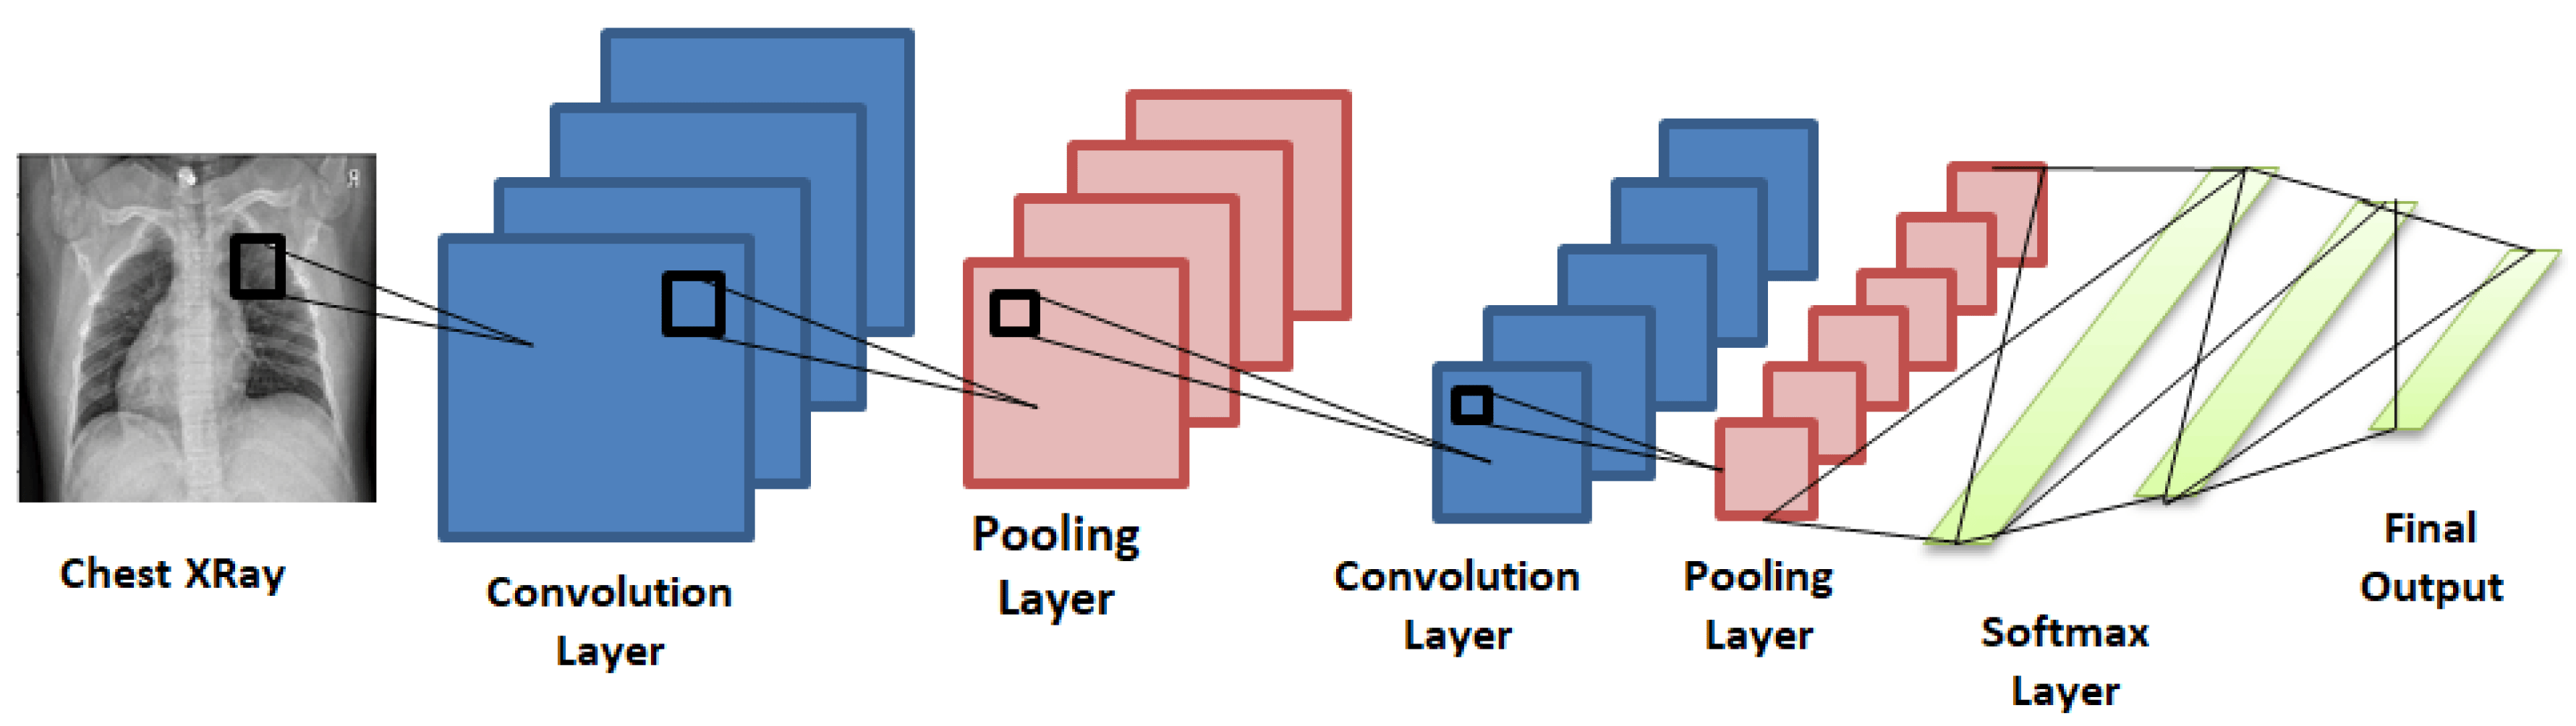

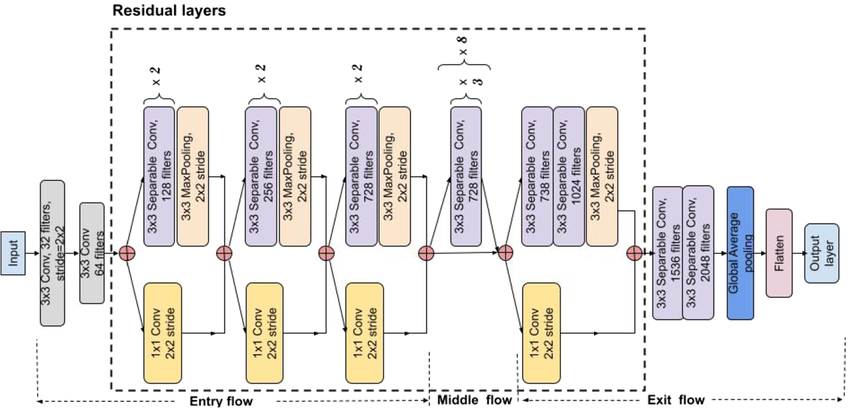

<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@300;400;500&display=swap" rel="stylesheet">

<div style="font-family: 'Roboto', sans-serif; padding: 20px; line-height: 1.6; color: #333;">

  <p style="font-size: 16px; font-weight: 300;">
    The Pneumonia Classification project is a deep learning initiative aimed at developing a robust model capable of accurately classifying chest X-ray images into two categories: Pneumonia and Normal. Utilizing a dataset of 5,863 high-quality X-ray images collected from pediatric patients at Guangzhou Women and Children’s Medical Center, this project employs advanced deep learning techniques to enhance diagnostic accuracy and streamline clinical workflows.
  </p>

  <h2 style="color: #4CAF50; font-weight: bold;">Dataset Overview</h2>
  <ul style="font-size: 16px; font-weight: 400; margin-left: 20px;">
    <li><strong>Total Images:</strong> 5,863</li>
    <li><strong>Categories:</strong> Pneumonia, Normal</li>
    <li><strong>Patient Age Range:</strong> 1 to 5 years old</li>
    <li><strong>Image Quality:</strong> Quality-controlled chest X-ray images</li>
  </ul>

  <h2 style="color: #4CAF50; font-weight: bold;">Technical Approach</h2>
  <ul style="font-size: 16px; font-weight: 400; margin-left: 20px;">
    <li><strong>Model Architecture:</strong> Xception</li>
    <li><strong>Custom Layers:</strong> Included Dense, Dropout, and BatchNormalization layers for improved learning</li>
    <li><strong>Input Shape:</strong> 256x256x3</li>
    <li><strong>Training Configuration:</strong> Early stopping with a maximum of 20 epochs</li>
  </ul>

</div>



<div style="text-align: center; font-family: 'Roboto', sans-serif; padding: 20px; font-size: 32px; font-weight: bold; color: #4CAF50;">
  BUSINESS CASE
</div>

The Pneumonia Classification project harnesses deep learning and computer vision technologies to tackle the critical issue of timely and accurate pneumonia diagnosis in young patients. This system can significantly enhance diagnostic efficiency in pediatric healthcare settings, providing clinicians with reliable tools for early detection and treatment of pneumonia. Applications extend to hospitals and clinics, where rapid image analysis can reduce patient wait times and optimize resource allocation.

Furthermore, the project supports medical research by providing valuable insights into pneumonia prevalence among children, facilitating targeted public health interventions. Integration into telemedicine platforms can also empower healthcare professionals to make informed decisions remotely, improving access to care in underserved areas. Overall, this initiative not only aims to improve patient outcomes but also contributes to a broader understanding of pediatric pneumonia trends.



<div style="text-align: left; font-family: 'Roboto', sans-serif; padding: 20px; font-size: 32px; font-weight: bold; color: #4CAF50;">
Importing Necessary Libraries
</div>

In [1]:
import requests
import zipfile
import os

# URL
url = "https://d3ilbtxij3aepc.cloudfront.net/projects/CNN-PROJECT-7-11/Chest-Xray-2.zip"

# Download 
response = requests.get(url)
zip_path = "Chest-Xray-2.zip"

# Write the file
with open(zip_path, "wb") as file:
    file.write(response.content)

# Unzip 
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("Chest_Xray")

extracted_files = os.listdir("Chest_Xray")
print("Extracted files:", extracted_files)


Extracted files: ['chest_xray']


<div style="text-align: left; font-family: 'Roboto', sans-serif; padding: 20px; font-size: 32px; font-weight: bold; color: #4CAF50;">
Importing Libraries
</div>


In [2]:
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

In [3]:
# there .DS files remove them before image processing

import os
directory = "/content/chest_xray"

for root, dirs, files in os.walk(directory):
    for file in files:
        if file == ".DS_Store":
            file_path = os.path.join(root, file)
            try:
                os.remove(file_path)
                print(f"Deleted: {file_path}")
            except Exception as e:
                print(f"Error deleting {file_path}: {e}")


Deleted: /content/chest_xray/test/.DS_Store
Deleted: /content/chest_xray/val/.DS_Store
Deleted: /content/chest_xray/val/NORMAL/.DS_Store
Deleted: /content/chest_xray/val/PNEUMONIA/.DS_Store
Deleted: /content/chest_xray/train/.DS_Store
Deleted: /content/chest_xray/train/NORMAL/.DS_Store
Deleted: /content/chest_xray/train/PNEUMONIA/.DS_Store


In [4]:
directory = "/content/chest_xray/train"

filepath =[]
label = []

folds = os.listdir(directory)

for fold in folds:
    f_path = os.path.join(directory , fold)

    imgs = os.listdir(f_path)

    for img in imgs:

        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)

file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_train = pd.concat([file_path_series ,Label_path_series ] , axis = 1)

In [5]:
df_train

,filepath,label
0,/content/chest_xray/train/NORMAL/NORMAL2-IM-05...,NORMAL
1,/content/chest_xray/train/NORMAL/NORMAL2-IM-11...,NORMAL
2,/content/chest_xray/train/NORMAL/NORMAL2-IM-08...,NORMAL
3,/content/chest_xray/train/NORMAL/IM-0580-0001....,NORMAL
4,/content/chest_xray/train/NORMAL/NORMAL2-IM-05...,NORMAL
...,...,...
5211,/content/chest_xray/train/PNEUMONIA/person601_...,PNEUMONIA
5212,/content/chest_xray/train/PNEUMONIA/person372_...,PNEUMONIA
5213,/content/chest_xray/train/PNEUMONIA/person15_b...,PNEUMONIA
5214,/content/chest_xray/train/PNEUMONIA/person1276...,PNEUMONIA


In [6]:
directory = "/content/chest_xray/test"

filepath =[]
label = []

folds = os.listdir(directory)

for fold in folds:
    f_path = os.path.join(directory , fold)

    imgs = os.listdir(f_path)

    for img in imgs:

        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)


file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_test = pd.concat([file_path_series ,Label_path_series ] , axis = 1)

In [7]:

df_test.sample(5)

,filepath,label
390,/content/chest_xray/test/PNEUMONIA/person1625_...,PNEUMONIA
201,/content/chest_xray/test/NORMAL/NORMAL2-IM-033...,NORMAL
104,/content/chest_xray/test/NORMAL/IM-0086-0001.jpeg,NORMAL
323,/content/chest_xray/test/PNEUMONIA/person91_ba...,PNEUMONIA
20,/content/chest_xray/test/NORMAL/IM-0035-0001.jpeg,NORMAL


In [8]:

print(f"The shape of The Train data is: {df_train.shape}")
print(f"The shape of The Test data is: {df_test.shape}")

The shape of The Train data is: (5216, 2)
The shape of The Test data is: (624, 2)


<div style="text-align:left; font-family: 'Roboto', sans-serif; padding: 20px; font-size: 32px; font-weight: bold; color: #4CAF50;">
Train Test & Valid split
</div>


In [9]:
data_dir = '/content/chest_xray/train'
test_dir = '/content/chest_xray/test'

IMAGE_SIZE = (256,256)

print('Training Images:')

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset='training',
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

print('Validation Images:')
validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset='validation',
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

print('Testing Images:')
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

Training Images:
Found 5216 files belonging to 2 classes.
Using 4695 files for training.
Validation Images:
Found 5216 files belonging to 2 classes.
Using 521 files for validation.
Testing Images:
Found 624 files belonging to 2 classes.


<div style="text-align:left; font-family: 'Roboto', sans-serif; padding: 20px; font-size: 32px; font-weight: bold; color: #4CAF50;">
Encoding Labels
</div>


In [10]:
train_labels = train_ds.class_names
test_labels = test_ds.class_names
validation_labels = validation_ds.class_names


class_labels = ['NORMAL', 'PNEUMONIA']
label_encoder = LabelEncoder()
label_encoder.fit(class_labels)
train_labels_encoded = label_encoder.transform(train_labels)
validation_labels_encoded = label_encoder.transform(validation_labels)
test_labels_encoded = label_encoder.transform(test_labels)

In [11]:
for image_batch, labels_batch in train_ds:
    print("Shape of X_train: ", image_batch.shape)
    print("Shape of y_train: ", labels_batch.shape)
    break

Shape of X_train:  (32, 256, 256, 3)
Shape of y_train:  (32,)


In [12]:
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))

validation_ds = validation_ds.map(lambda x, y: (x / 255.0, y))

test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

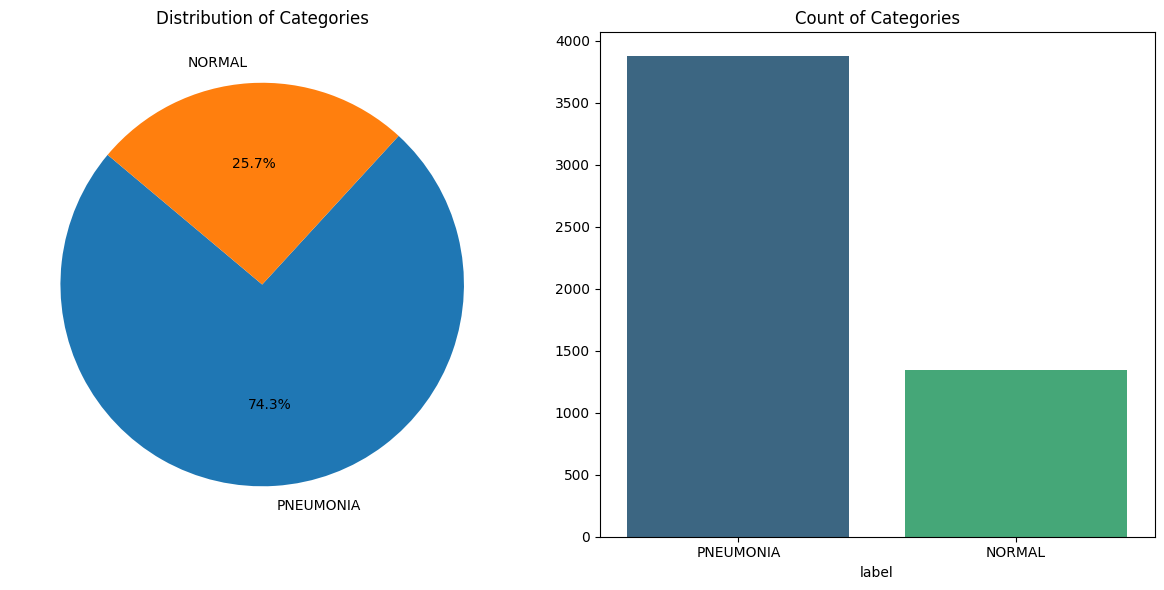

In [13]:
count = df_train['label'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

plt.tight_layout()
plt.show()

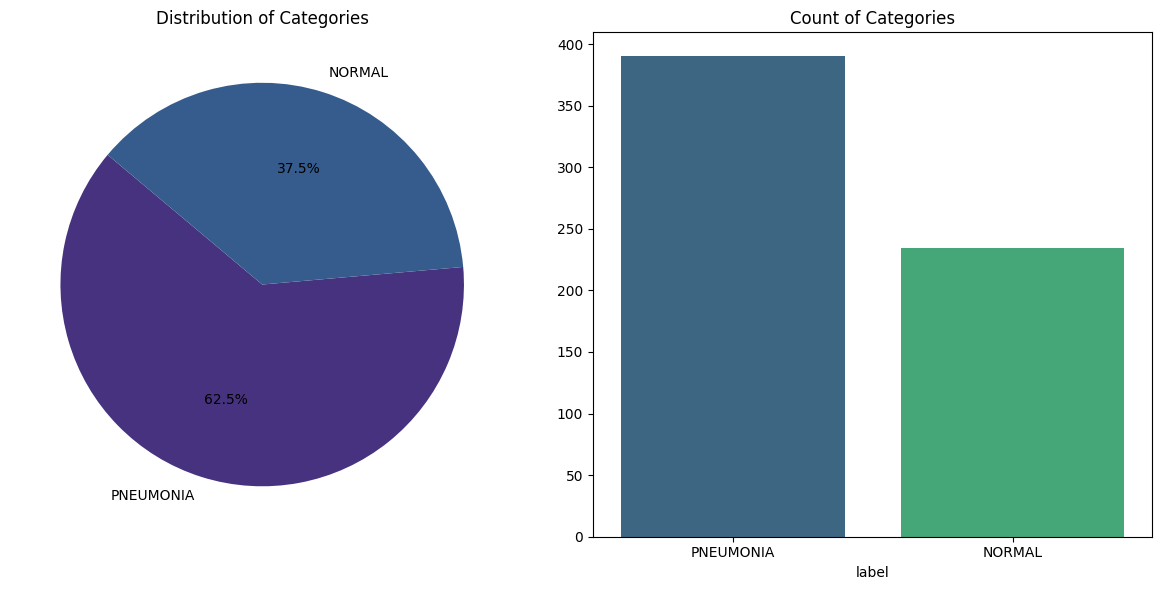

In [14]:
count = df_test['label'].value_counts()
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')
plt.tight_layout()
plt.show()

In [15]:
def visualize_images(path, num_images=5):
    
    image_filenames = os.listdir(path)

    
    num_images = min(num_images, len(image_filenames))

    
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3),facecolor='white')

    
    for i, image_filename in enumerate(image_filenames[:num_images]):
        
        image_path = os.path.join(path, image_filename)
        image = mpimg.imread(image_path)

        
        axes[i].imshow(image)
        axes[i].axis('off')  
        axes[i].set_title(image_filename)  

    plt.tight_layout()
    plt.show()

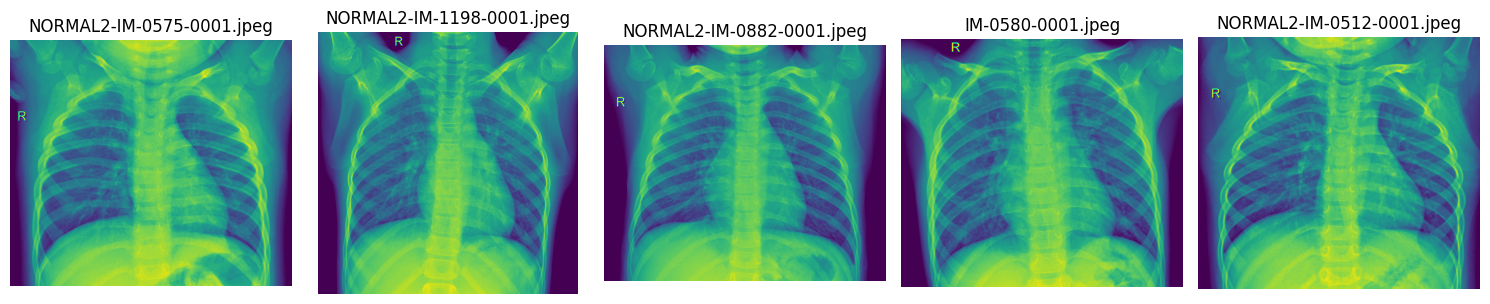

In [16]:
path_to_visualize = "/content/chest_xray/train/NORMAL"
visualize_images(path_to_visualize, num_images=5)

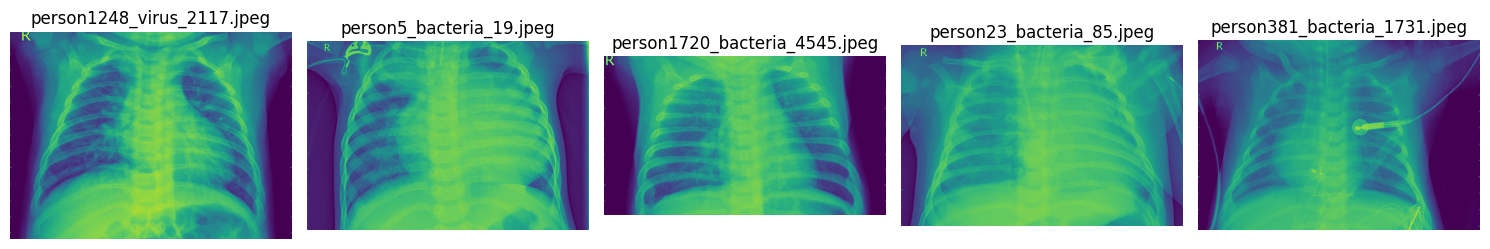

In [17]:
path_to_visualize = "/content/chest_xray/train/PNEUMONIA"
visualize_images(path_to_visualize, num_images=5)

In [22]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image

directories = [
    '/content/chest_xray/train',
    '/content/chest_xray/test',
    '/content/chest_xray/val'
]


target_size = (256, 256, 3)

def resize_and_save_image(img_path, save_path):
    
    img = image.load_img(img_path, target_size=target_size)

    
    img_array = image.img_to_array(img)

    
    img = tf.keras.preprocessing.image.array_to_img(img_array)
    img.save(save_path)


for directory in directories:
    for label in ['NORMAL', 'PNEUMONIA']:
        # Path for NORMAL and PNEUMONIA subfolders
        folder_path = os.path.join(directory, label)

        # Ensure the directory exists
        if os.path.exists(folder_path):
            # Loop through each image in the folder
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)

                
                if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    
                    save_path = img_path  # Save in the same location
                    resize_and_save_image(img_path, save_path)
                    print(f"Resized and saved: {save_path}")


Streaming output truncated to the last 5000 lines.
Resized and saved: /content/chest_xray/train/NORMAL/NORMAL2-IM-0466-0001.jpeg
Resized and saved: /content/chest_xray/train/NORMAL/IM-0547-0001.jpeg
Resized and saved: /content/chest_xray/train/NORMAL/NORMAL2-IM-0555-0001.jpeg
Resized and saved: /content/chest_xray/train/NORMAL/NORMAL2-IM-0500-0001.jpeg
Resized and saved: /content/chest_xray/train/NORMAL/NORMAL2-IM-1318-0001.jpeg
Resized and saved: /content/chest_xray/train/NORMAL/NORMAL2-IM-1285-0001.jpeg
Resized and saved: /content/chest_xray/train/NORMAL/IM-0453-0001.jpeg
Resized and saved: /content/chest_xray/train/NORMAL/NORMAL2-IM-0930-0001.jpeg
Resized and saved: /content/chest_xray/train/NORMAL/NORMAL2-IM-1091-0001.jpeg
Resized and saved: /content/chest_xray/train/NORMAL/IM-0555-0001-0002.jpeg
Resized and saved: /content/chest_xray/train/NORMAL/IM-0559-0001.jpeg
Resized and saved: /content/chest_xray/train/NORMAL/IM-0166-0001.jpeg
Resized and saved: /content/chest_xray/train/NOR

In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np


img_path = '/content/chest_xray/test/NORMAL/IM-0001-0001.jpeg'  
img = image.load_img(img_path, target_size=(256, 256))  


img_array = image.img_to_array(img)


print("Image shape:", img_array.shape)   


img_batch = np.expand_dims(img_array, axis=0)
print("Image shape with batch dimension:", img_batch.shape)  


Image shape: (256, 256, 3)
Image shape with batch dimension: (1, 256, 256, 3)


<div style="text-align:left; font-family: 'Roboto', sans-serif; padding: 20px; font-size: 32px; font-weight: bold; color: #4CAF50;">
Transfer Learning - Xception Model
</div>



In [21]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adamax
input_shape = (256, 256, 3)
inputs = Input(shape=input_shape)
base_model = Xception(weights='imagenet', include_top=False, input_tensor=inputs)
base_model.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.45)(x)
x = Dense(220, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(60, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)


model = Model(inputs=inputs, outputs=outputs)


model.compile(optimizer=Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 127, 127, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 127, 127, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 127, 127, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 125, 125, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 125, 125, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 125, 125, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 125, 125, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 125, 125, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 125, 125, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 125, 125, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 125, 125, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 63, 63, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 63, 63, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization  

 Total params: 21,333,773 (81.38 MB)

 Trainable params: 468,197 (1.79 MB)

 Non-trainable params: 20,865,576 (79.60 MB)

<div style="text-align:center; font-family: 'Roboto', sans-serif; padding: 20px; font-size: 32px; font-weight: bold; color: #4CAF50;">
Model Training
</div>


In [24]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    train_ds,
    epochs=20,
    validation_data=validation_ds,
    callbacks=[early_stopping]
)


Epoch 1/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 63s 293ms/step - accuracy: 0.8926 - loss: 0.2640 - val_accuracy: 0.9674 - val_loss: 0.1687
Epoch 2/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 25s 172ms/step - accuracy: 0.9430 - loss: 0.1441 - val_accuracy: 0.9655 - val_loss: 0.0981
Epoch 3/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 26s 174ms/step - accuracy: 0.9466 - loss: 0.1219 - val_accuracy: 0.9712 - val_loss: 0.0754
Epoch 4/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 40s 167ms/step - accuracy: 0.9607 - loss: 0.1071 - val_accuracy: 0.9712 - val_loss: 0.0798
Epoch 5/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 42s 176ms/step - accuracy: 0.9647 - loss: 0.0985 - val_accuracy: 0.9674 - val_loss: 0.0830
Epoch 6/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 40s 168ms/step - accuracy: 0.9573 - loss: 0.1005 - val_accuracy: 0.9731 - val_loss: 0.0775
Epoch 7/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 42s 174ms/step - accuracy: 0.9640 - loss: 0.0840 - val_accuracy: 0.9770 - val_loss: 0.0707
Epoch 8/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 41s 171ms/step - accuracy: 0.9668 - loss: 0

In [25]:
model.save('best_model.keras')


<div style="text-align:left; font-family: 'Roboto', sans-serif; padding: 20px; font-size: 32px; font-weight: bold; color: #4CAF50;">
Model Evaluation
</div>


In [26]:
validation_loss, validation_accuracy = model.evaluate(validation_ds)

print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.9787 - loss: 0.0612
Validation Loss: 0.0683855339884758
Validation Accuracy: 0.973128616809845


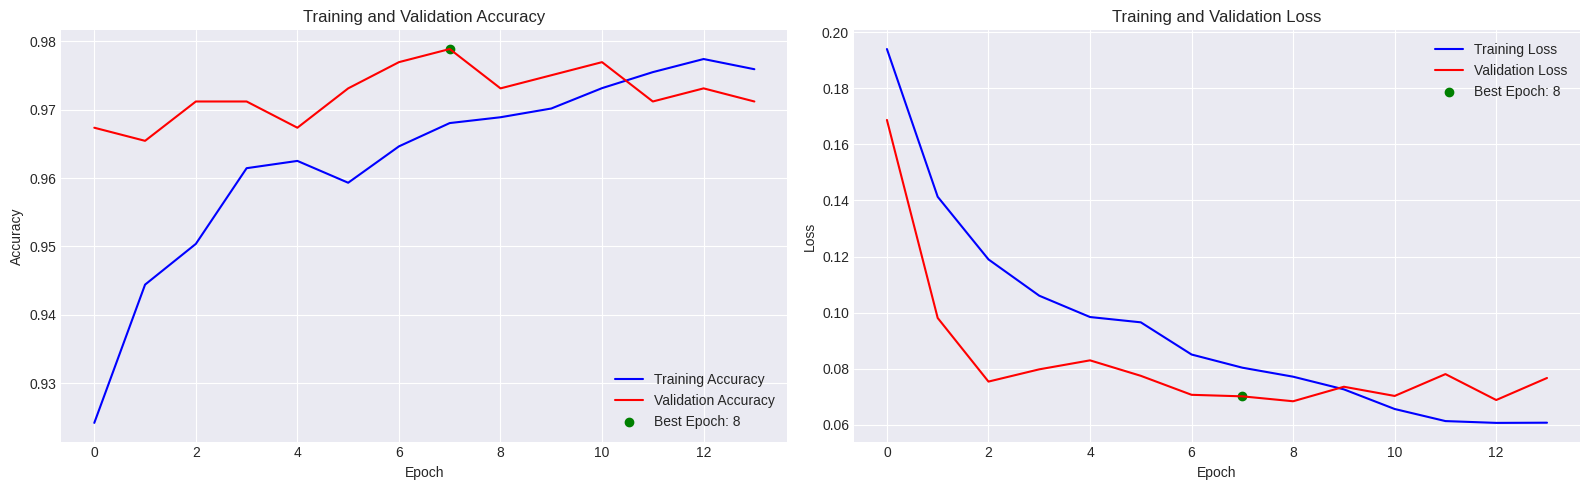

In [27]:

best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1


plt.style.use('seaborn-darkgrid')


fig, axs = plt.subplots(1, 2, figsize=(16, 5))


axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

<div style="text-align:left; font-family: 'Roboto', sans-serif; padding: 20px; font-size: 32px; font-weight: bold; color: #4CAF50;">
Model Predictions
</div>


Testing Images:
Found 624 files belonging to 2 classes.
Testing Images:
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 559ms/step


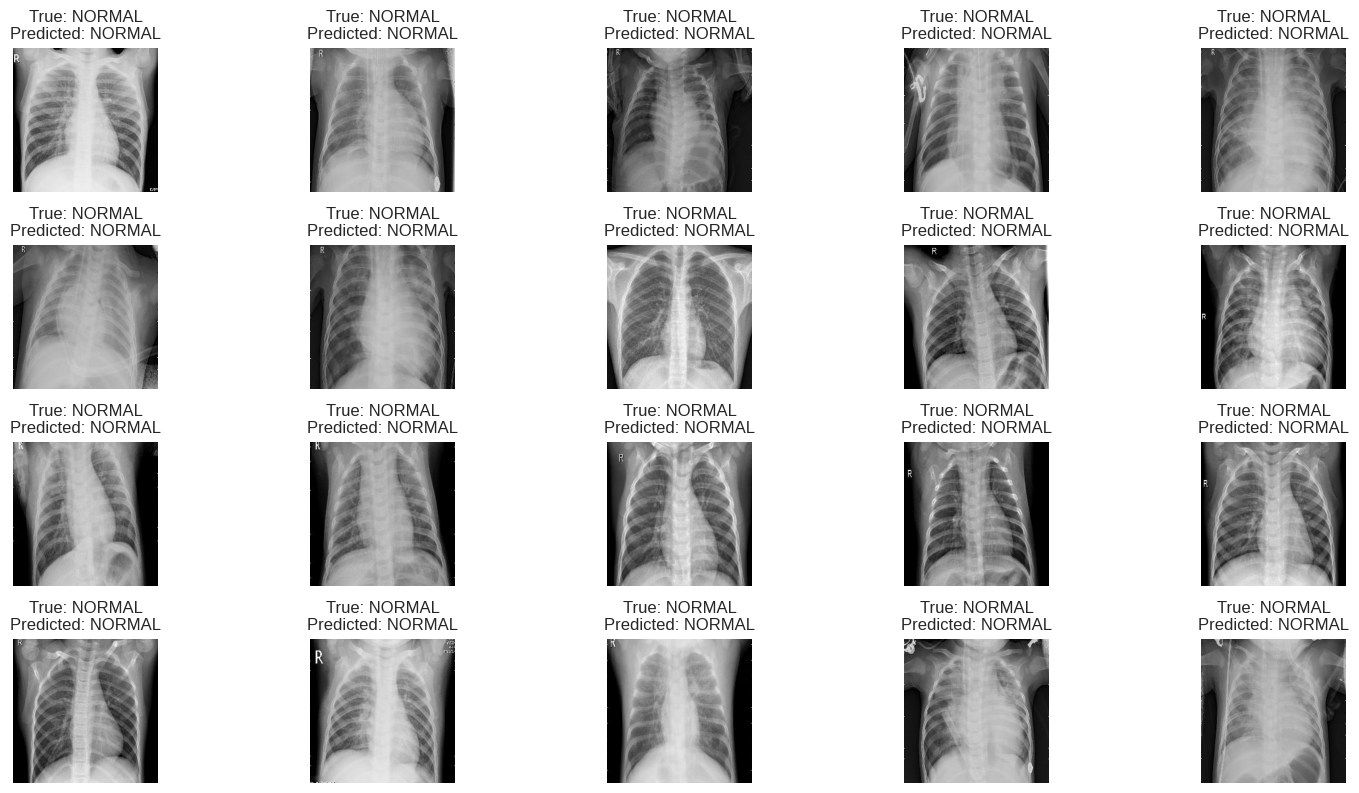

In [28]:
test_dir = '/content/chest_xray/test'
print('Testing Images:')
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

def plot_images_with_predictions(model, dataset, class_labels, num_images=40, num_images_per_row=5):
    # Generate predictions for a set number of images
    predictions = model.predict(dataset)

    # Shuffle the dataset
    dataset_shuffled = dataset.shuffle(buffer_size=len(dataset))

    plt.figure(figsize=(15, 10))
    for i, (images, labels) in enumerate(dataset_shuffled.take(num_images)):
        
        images = images.numpy()

       
        for j in range(len(images)):
            if i * num_images_per_row + j < num_images:  # Check if the total number of images exceeds the desired count
                predicted_class = class_labels[np.argmax(predictions[i * num_images_per_row + j])]
                true_class = class_labels[np.argmax(labels[j])]

                plt.subplot(num_images // num_images_per_row + 1, num_images_per_row, i * num_images_per_row + j + 1)
                plt.imshow(images[j].astype("uint8"))
                plt.title(f'True: {true_class}\nPredicted: {predicted_class}')
                plt.axis('off')

    plt.tight_layout()
    plt.show()


print('Testing Images:')
plot_images_with_predictions(model, test_ds, class_labels, num_images=20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


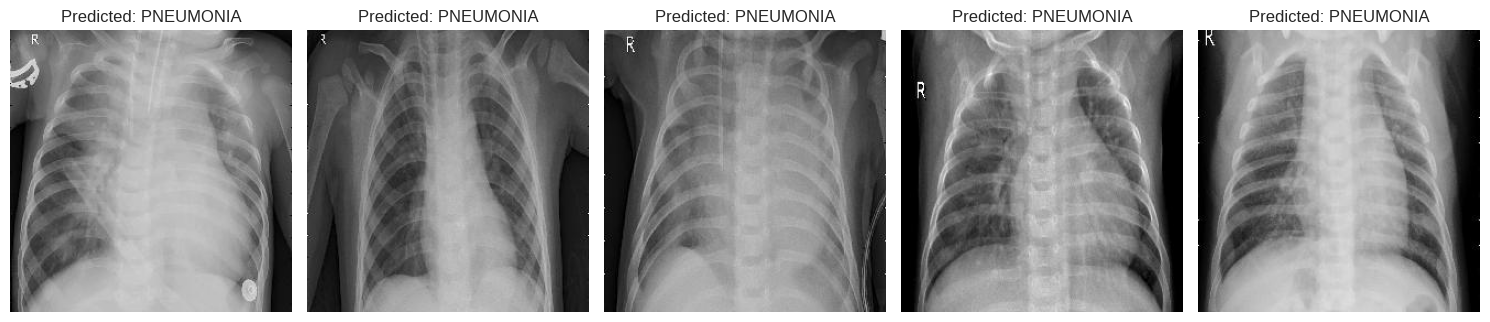

In [29]:

directory_path = '/content/chest_xray/test/PNEUMONIA'

image_files = os.listdir(directory_path)[:5]


fig, axs = plt.subplots(1, len(image_files), figsize=(15, 5))

for i, image_file in enumerate(image_files):
    img_path = os.path.join(directory_path, image_file)
    
    img = cv2.imread(img_path)
    
    img = cv2.resize(img, (256, 256))

    
    img_array = img.astype(np.float32) / 255.0

    
    img_array = np.expand_dims(img_array, axis=0)

    
    predictions = model.predict(img_array)
    actual_prediction = (predictions > 0.5).astype(int)
    axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[i].axis('off')
    if actual_prediction[0][0] == 0:
        predicted_label = 'Normal'
    else:
        predicted_label = 'PNEUMONIA'
    axs[i].set_title(f'Predicted: {predicted_label}')


plt.tight_layout()
plt.show()

<div style="text-align:center; font-family: 'Roboto', sans-serif; padding: 20px; font-size: 36px; font-weight: bold; color: #4CAF50;">
CONCLUSION
</div>


<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@300;400;500&display=swap" rel="stylesheet">

<div style="font-family: 'Roboto', sans-serif; padding: 20px; line-height: 1.6; color: #333;">

  <p style="font-size: 16px; font-weight: 300;">
    This project successfully addressed pneumonia classification through deep learning techniques, specifically utilizing the <strong>Xception</strong> model for analyzing chest X-ray images. The model effectively distinguished between pneumonia and normal cases, achieving a validation accuracy of <strong>97.31%</strong> and a final validation loss of <strong>0.0684</strong> after 20 epochs of training. These results underscore the potential of deep learning models in enhancing diagnostic accuracy in healthcare settings.
  </p>

  <h2 style="color: #4CAF50; font-weight: bold;">Key Insights:</h2>
  <ul style="font-size: 16px; font-weight: 400; margin-left: 20px;">
    <li><strong>Xception</strong> demonstrated exceptional performance in classifying chest X-ray images, highlighting its suitability for medical imaging tasks.</li>
    <li>The model's architecture enabled efficient training and inference, benefitting from transfer learning and pre-trained weights, which significantly improved its diagnostic accuracy.</li>
    <li>Training metrics showed a consistent increase in accuracy and a reduction in loss throughout the epochs, indicating the model's effective learning and generalization capabilities.</li>
  </ul>

  <h2 style="color: #4CAF50; font-weight: bold;">Model Evaluation:</h2>
  <ul style="font-size: 16px; font-weight: 400; margin-left: 20px;">
    <li><strong>Final Validation Loss:</strong> 0.0684</li>
    <li><strong>Final Validation Accuracy:</strong> 97.31%</li>
    <li><strong>Test Accuracy:</strong> 97.50%</li>
  </ul>

  <h2 style="color: #4CAF50; font-weight: bold;">Challenges and Recommendations:</h2>
  <ul style="font-size: 16px; font-weight: 400; margin-left: 20px;">
    <li><strong>Data Diversity:</strong> While the model showed excellent performance, it may struggle with variations in unseen data. Expanding the dataset with a more diverse range of X-ray images could enhance generalization.</li>
    <li><strong>Model Optimization:</strong> Further improvement may be achieved through hyperparameter tuning and experimenting with advanced techniques, such as incorporating data augmentation or exploring other architectures tailored for medical imaging.</li>
  </ul>

</div>
